In [1]:
import numpy as np
import math
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)
from matplotlib import patches

In [2]:
netflix = Table.read_table("titles.csv").where("type", are.equal_to("MOVIE")).where("imdb_score",are.between(0,11)).where("runtime",are.above_or_equal_to(60))
netflix_t = Table().with_columns(
            "runtime",netflix.column("runtime"),
            "imdb_score",netflix.column("imdb_score"))
#netflix_t = netflix_t.sample(k = 3113)
netflix_t

runtime,imdb_score
113,8.3
91,8.2
94,8
133,8.1
102,7.7
170,7.8
104,5.8
110,7.7
117,7.3
158,7.5


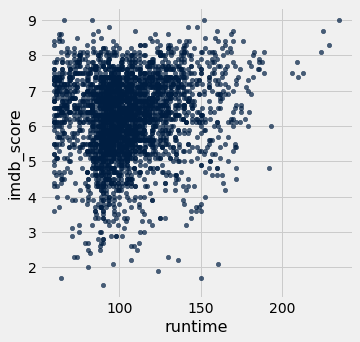

In [3]:
netflix_t.scatter("runtime")

In [4]:
runtime_mean = np.mean(netflix_t.column("runtime"))
runtime_std = np.std(netflix_t.column("runtime"))
print("runtime mean y std",[runtime_mean,runtime_std])

runtime mean y std [104.97046019900498, 24.35184793905636]


In [5]:
imdb_score_mean = np.mean(netflix_t.column("imdb_score"))
imdb_score_std = np.std(netflix_t.column("imdb_score"))
print("imdb_score mean y std",[imdb_score_mean,imdb_score_std])

imdb_score mean y std [6.262499999999999, 1.1258962019043703]


In [6]:
netflix_t_su = Table().with_columns(
               "runtime (SU)",(netflix_t.column("runtime")-runtime_mean)/runtime_std,
               "imdb_score (SU)",(netflix_t.column("imdb_score")-imdb_score_mean)/imdb_score_std)
netflix_t_su

runtime (SU),imdb_score (SU)
0.32973,1.80967
-0.573692,1.72085
-0.450498,1.54322
1.15102,1.63203
-0.121981,1.27676
2.67041,1.36558
-0.0398516,-0.410784
0.206536,1.27676
0.493989,0.921488
2.17764,1.09912


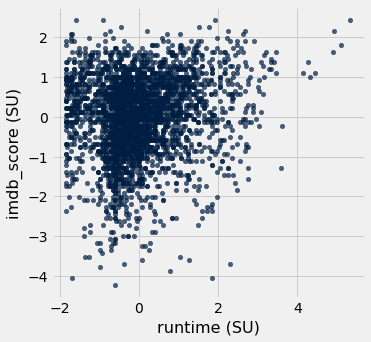

In [7]:
netflix_t_su.scatter("runtime (SU)")

In [8]:
r = np.mean(netflix_t_su.column(0)*netflix_t_su.column(1))
slope = r * (imdb_score_std/runtime_std)
inter = imdb_score_mean - slope * runtime_mean
print("r, slope, inter", [r,slope,inter])

r, slope, inter [0.13583684813311295, 0.006280352594779672, 5.603248497913962]


## Predicción

In [9]:
prediction = netflix_t.with_column(
    "prediction", slope * netflix_t.column(0) + inter)
prediction

runtime,imdb_score,prediction
113,8.3,6.31293
91,8.2,6.17476
94,8,6.1936
133,8.1,6.43854
102,7.7,6.24384
170,7.8,6.67091
104,5.8,6.25641
110,7.7,6.29409
117,7.3,6.33805
158,7.5,6.59554


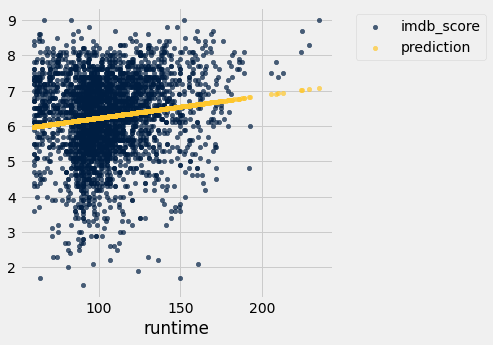

In [10]:
prediction.scatter("runtime")

### Conclusion
Hay una coorelacion positiva entre el tiempo de una pelicula y su calificacion

## RMSE

In [14]:
prediction = prediction.with_column(
    "error", prediction.column(1) - prediction.column(2))
prediction

runtime,imdb_score,prediction,error
113,8.3,6.31293,1.98707
91,8.2,6.17476,2.02524
94,8,6.1936,1.8064
133,8.1,6.43854,1.66146
102,7.7,6.24384,1.45616
170,7.8,6.67091,1.12909
104,5.8,6.25641,-0.456405
110,7.7,6.29409,1.40591
117,7.3,6.33805,0.96195
158,7.5,6.59554,0.904456


In [15]:
prediction = prediction.with_column(
    "error^2", prediction.column("error")**2)
prediction

runtime,imdb_score,prediction,error,error^2
113,8.3,6.31293,1.98707,3.94845
91,8.2,6.17476,2.02524,4.10159
94,8,6.1936,1.8064,3.26308
133,8.1,6.43854,1.66146,2.76046
102,7.7,6.24384,1.45616,2.12039
170,7.8,6.67091,1.12909,1.27485
104,5.8,6.25641,-0.456405,0.208306
110,7.7,6.29409,1.40591,1.97659
117,7.3,6.33805,0.96195,0.925348
158,7.5,6.59554,0.904456,0.81804


In [16]:
rmse = np.sqrt(np.mean(prediction.column("error^2")))
print("El rmse es de:", rmse)

El rmse es de: 1.115460517937104
